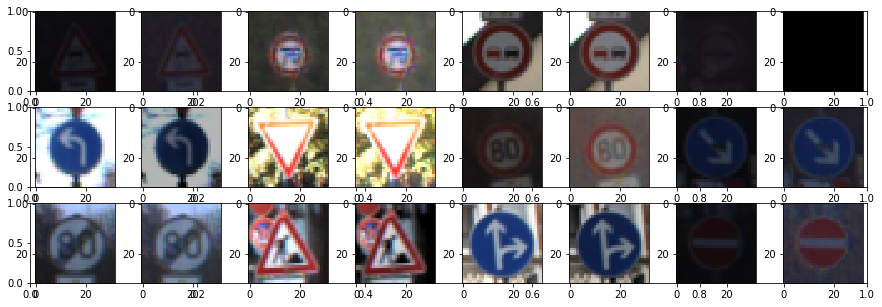

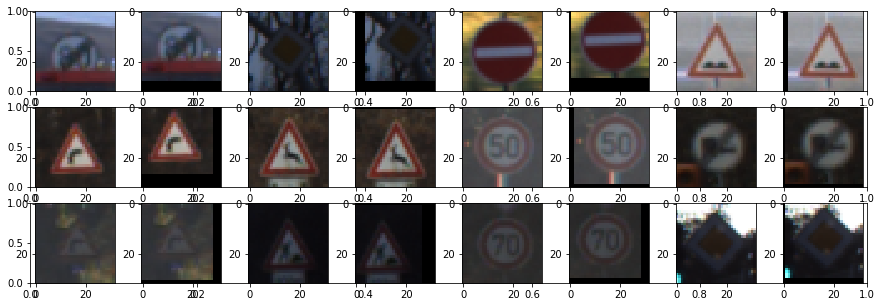

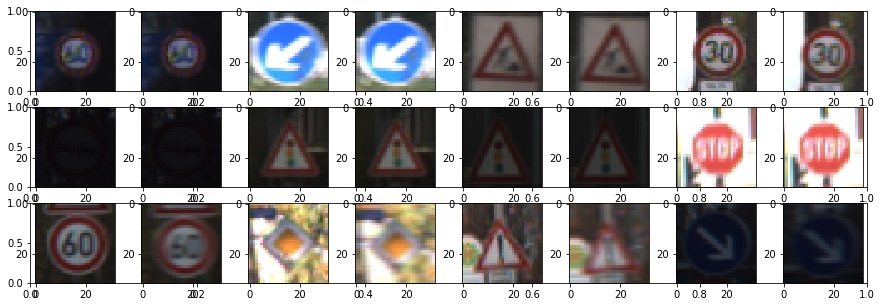

0.8862215487685099
0.8947837882939673
1.0186915806942376
1.0523407885899978
1.0731413328139496
0.8829922991463959
0.9244675936813617
0.8543599438248838
1.1582320599845919
0.8923065674187849


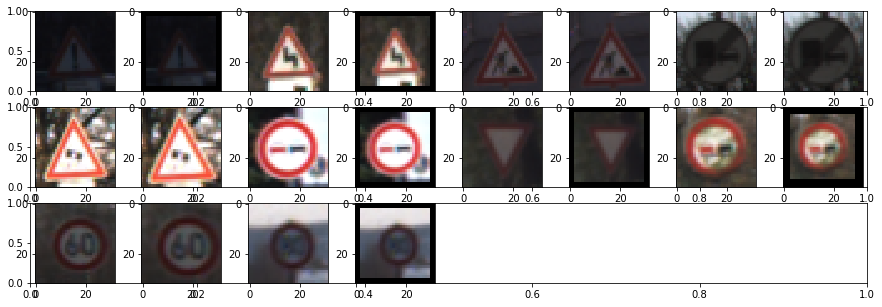

In [30]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import random
import cv2
import numpy as np


def bgr_to_rgb(bgr):
    rgb = bgr[...,::-1]
    return rgb


def gamma_change(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


plot_number = 0
# sinle large plot with many subplots
f, axs = plt.subplots(3,1,figsize=(15,5))

for i in range(1,13):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    image4 = image 
    bright = image4.mean()
    #print ("brightness", bright)
    image4 = cv2.cvtColor(image4,cv2.COLOR_BGR2HSV)
    v = image4[...,2]
    brightness_change = np.random.randint(-80,80)
    #print (brightness_change)
    v2 = cv2.add(v,brightness_change)
    image4[...,2] = v2
    image4 = cv2.cvtColor(image4,cv2.COLOR_HSV2BGR)
    f.add_subplot(3,8, plot_number+1)
    plt.imshow(image.squeeze())
    
    f.add_subplot(3,8, plot_number+2)
    plt.imshow(image4.squeeze())
    plot_number += 2

plt.savefig("brightness_change.png")
plt.show()

plot_number = 0
# sinle large plot with many subplots
f, axs = plt.subplots(3,1,figsize=(15,5))

for i in range(12):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    image4 = image 
    shift_x = np.random.randint(-5,5)
    shift_y = np.random.randint(-5,5)
    #print ("shifts",shift_x,shift_y)
    move_matrix = np.float32([[1,0,shift_x],[0,1,shift_y]])
    image5 = cv2.warpAffine(image4,move_matrix,(32,32))
    f.add_subplot(3,8, plot_number+1)
    plt.imshow(image.squeeze())
    
    f.add_subplot(3,8, plot_number+2)
    plt.imshow(image5.squeeze())
    plot_number += 2

plt.savefig("shift_change.png")
plt.show()

plot_number = 0
# sinle large plot with many subplots
f, axs = plt.subplots(3,1,figsize=(15,5))

# directional blur based on packtub publication "open cv with python by example"
for i in range(12):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    
    image6 = image 
    image_sharpness = cv2.Laplacian(image6, cv2.CV_64F).var()
    #print (image_sharpness)
    
    if image_sharpness > 150:
        size = np.random.randint(1,5)
        kernel = np.zeros((size,size))
        kernel[int((size-1)/2),:] = np.ones(size)
        kernel = kernel / size
        #print (kernel)

        image6 = cv2.filter2D(image6, -1 ,kernel)
        #print (cv2.Laplacian(image6, cv2.CV_64F).var())
    else:
        image6 = image
        #print ("not so sharp")
    f.add_subplot(3,8, plot_number+1)
    plt.imshow(image.squeeze())
    
    f.add_subplot(3,8, plot_number+2)
    plt.imshow(image6.squeeze())
    plot_number += 2

plt.savefig("blur_change.png")
plt.show()

plot_number = 0
# sinle large plot with many subplots
f, axs = plt.subplots(3,1,figsize=(15,5))

for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    image7 = image 
    scale = np.random.uniform(0.8,1.2)
    #print (scale)
    if scale > 1:
        image7 = cv2.resize(image7,None, fx=scale,fy=scale,interpolation = cv2.INTER_CUBIC)
        start_x = int((image7.shape[0]-32)/2)
        start_y = int((image7.shape[0]-32)/2)
        image8 = image7[start_x:start_x+32 , start_y:start_y+32]
        #crop
    else:
        scale =  (scale * 32 - (scale *32 %2)) / 32
        image7 = cv2.resize(image7,None, fx=scale,fy=scale,interpolation = cv2.INTER_AREA)
        #print ("before padding", image7.shape)
        horiz_pad = np.ceil((32-image7.shape[0])/2) 
        vertical_pad = np.ceil((32-image7.shape[1])/2) 
        #print ("padding", horiz_pad, vertical_pad)
        horiz_pad = int(horiz_pad)
        vertical_pad = int(vertical_pad)
        
        image8 = cv2.copyMakeBorder(image7, horiz_pad, horiz_pad, vertical_pad, vertical_pad, cv2.BORDER_CONSTANT, (0,0,0))
        
        #pad
        
    f.add_subplot(3,8, plot_number+1)
    plt.imshow(image.squeeze())
    
    f.add_subplot(3,8, plot_number+2)
    plt.imshow(image8.squeeze())
    plot_number += 2

plt.savefig("scale_change.png")
plt.show()